In [ ]:
import os
import pandas as pd
import kagglehub
os.environ["KAGGLEHUB_CACHE"] = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))

us_weather_events_path = kagglehub.dataset_download("sobhanmoosavi/us-weather-events")
us_weather_df = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(),
                                                      us_weather_events_path,
                                                      'WeatherEvents_Jan2016-Dec2022.csv')))


100%|██████████| 92.6M/92.6M [00:00<00:00, 112MB/s]

Extracting files...


## Изучение схемы датасета

In [ ]:
us_weather_df.info()
print("\n") # Add a newline for better readability between outputs
us_weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627181 entries, 0 to 8627180
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   EventId            object 
 1   Type               object 
 2   Severity           object 
 3   StartTime(UTC)     object 
 4   EndTime(UTC)       object 
 5   Precipitation(in)  float64
 6   TimeZone           object 
 7   AirportCode        object 
 8   LocationLat        float64
 9   LocationLng        float64
 10  City               object 
 11  County             object 
 12  State              object 
 13  ZipCode            float64
dtypes: float64(4), object(10)
memory usage: 921.5+ MB




,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


## Определение периода данных

In [ ]:
us_weather_df['StartTime(UTC)'] = pd.to_datetime(us_weather_df['StartTime(UTC)'])
us_weather_df['EndTime(UTC)'] = pd.to_datetime(us_weather_df['EndTime(UTC)'])

min_start_time = us_weather_df['StartTime(UTC)'].min()
max_end_time = us_weather_df['EndTime(UTC)'].max()

print(f"Минимальное время начала (UTC): {min_start_time}")
print(f"Максимальное время окончания (UTC): {max_end_time}")

Минимальное время начала (UTC): 2016-01-01 05:00:00
Максимальное время окончания (UTC): 2023-01-01 00:00:00


## Географический охват и единица наблюдения

- **Географический охват**: Данные относятся к городам **Соединенных Штатов Америки**.

In [ ]:
us_weather_df['geography'] = us_weather_df['City'] + ', ' + us_weather_df['State']
us_weather_df['geography'].unique()

array(['Saguache, CO', 'Altus, OK', 'Albert Lea, MN', ...,
       'Camdenton, MO', 'Battle Mountain, NV', 'Rock River, WY'],
      dtype=object)

- **Единица наблюдения**: Каждая строка в датафрейме `us_weather_df` представляет собой **отдельное погодное событие**. Это событие характеризуется следующими атрибутами:
    - **Тип события** (`Type`)
    - **Серьезность** (`Severity`)
    - **Время начала** (`StartTime(UTC)`)
    - **Время окончания** (`EndTime(UTC)`)
    - **Местоположение**, включая широту (`LocationLat`), долготу (`LocationLng`), город (`City`), округ (`County`) и штат (`State`).
    - Дополнительные детали, такие как количество осадков (`Precipitation(in)`), часовой пояс (`TimeZone`), код аэропорта (`AirportCode`) и почтовый индекс (`ZipCode`).

## Словарь переменных для `us_weather_df`

Ниже представлена таблица, содержащая имя каждого столбца, его тип данных и краткое описание:

| Имя столбца         | Тип данных | Описание                                                         |
|---------------------|------------|------------------------------------------------------------------|
| `EventId`           | `object`   | Уникальный идентификатор погодного события.                      |
| `Type`              | `object`   | Тип погодного события (например, Snow, Cold, Rain, Fog).         |
| `Severity`          | `object`   | Степень серьезности погодного события (например, Light, Moderate, Severe). |
| `StartTime(UTC)`    | `datetime` | Время начала погодного события в формате UTC.                    |
| `EndTime(UTC)``     | `datetime` | Время окончания погодного события в формате UTC.                 |
| `Precipitation(in)` | `float64`  | Количество осадков в дюймах.                                     |
| `TimeZone`          | `object`   | Часовой пояс, в котором произошло событие.                        |
| `AirportCode`       | `object`   | Код аэропорта, ближайшего к месту события.                       |
| `LocationLat`       | `float64`  | Широта местоположения события.                                   |
| `LocationLng`       | `float64`  | Долгота местоположения события.                                  |
| `City`              | `object`   | Город, где произошло событие.                                    |
| `County`            | `object`   | Округ, где произошло событие.                                    |
| `State`             | `object`   | Штат, где произошло событие.                                     |
| `ZipCode`           | `float64`  | Почтовый индекс местоположения события.                          |

## Анализ пропусков

In [ ]:
missing_values = us_weather_df.isnull().sum()
missing_percentage = (missing_values / len(us_weather_df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage.round(2)
})

# Filter to show only columns with missing values and sort by percentage
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage (%)', ascending=False)

print("Доля пропущенных значений для каждой переменной:")
print(missing_info)

Доля пропущенных значений для каждой переменной:
           Missing Count  Missing Percentage (%)
ZipCode            69199                     0.8
City               16912                     0.2
geography          16912                     0.2


### Предложения по обработке пропущенных значений

На основе анализа пропущенных значений можно предложить следующие стратегии их обработки:

-   **`ZipCode` (0.8% пропусков):** Поскольку процент пропусков в `ZipCode` относительно невелик, и эта переменная часто используется для геопространственного анализа, возможно несколько подходов:
    -   **Удаление строк:** Если эти данные не критичны для дальнейшего анализа или нет надежного способа их восстановления, можно удалить строки с пропущенными значениями.
    -   **Вменение (Imputation):** Можно попытаться вменить пропущенные значения, используя, например, медианный почтовый индекс для соответствующего города/округа/штата. Однако это может быть сложно, так как `ZipCode` может быть уникальным для каждого города.
    -   **Игнорирование:** Если `ZipCode` не является ключевой переменной для конкретного анализа, можно просто игнорировать эти пропуски, но это может повлиять на точность географических привязок.

-   **`City` и `geography` (0.2% пропусков):** Пропуски в `City` и `geography` взаимосвязаны (поскольку `geography` создается из `City` и `State`). 0.2% пропусков — это очень маленький процент, поэтому:
    -   **Удаление строк:** Для такого малого количества пропусков, удаление соответствующих строк является наиболее простым и безопасным вариантом, который вряд ли существенно повлияет на общий объем данных или статистическую значимость.
    -   **Ручное исправление/Восстановление:** Если есть внешние источники данных или возможность ручной проверки, можно попытаться восстановить названия городов на основе `LocationLat`, `LocationLng` или `AirportCode`.

**Общее соображение:** В целом, при таком низком проценте пропусков (менее 1%), удаление строк с пропущенными значениями во всех трех столбцах будет наименее инвазивным и наиболее практичным решением для сохранения качества данных без значительной потери информации.

## Проверка дубликатов


In [ ]:
duplicate_rows = us_weather_df.duplicated().sum()
print(f"Количество полных дубликатов строк в us_weather_df: {duplicate_rows}")

Количество полных дубликатов строк в us_weather_df: 0


## Валидация данных

In [ ]:
negative_precipitation_count = us_weather_df[us_weather_df['Precipitation(in)'] < 0].shape[0]

print(f"Количество записей с отрицательным значением осадков: {negative_precipitation_count}")

if negative_precipitation_count > 0:
    print("Обнаружены отрицательные значения осадков. Рекомендуется дальнейший анализ или исправление данных.")
else:
    print("Все значения в 'Precipitation(in)' являются неотрицательными.")

Количество записей с отрицательным значением осадков: 0
Все значения в 'Precipitation(in)' являются неотрицательными.


In [ ]:
min_lat_us = 24.396308
max_lat_us = 49.384358
min_lng_us = -125.0
max_lng_us = -66.934570

out_of_bounds_locations = us_weather_df[
    (us_weather_df['LocationLat'] < min_lat_us) |
    (us_weather_df['LocationLat'] > max_lat_us) |
    (us_weather_df['LocationLng'] < min_lng_us) |
    (us_weather_df['LocationLng'] > max_lng_us)
]

print(f"Количество записей с координатами за пределами США: {len(out_of_bounds_locations)}")

if len(out_of_bounds_locations) > 0:
    print("Обнаружены записи с координатами за пределами США. Рекомендуется дальнейший анализ или исправление данных.")
else:
    print("Все значения LocationLat и LocationLng находятся в пределах границ США.")

Количество записей с координатами за пределами США: 0
Все значения LocationLat и LocationLng находятся в пределах границ США.


## Определение и фильтрация выбросов

In [ ]:
Q1 = us_weather_df['Precipitation(in)'].quantile(0.25)
Q3 = us_weather_df['Precipitation(in)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_precipitation = us_weather_df[
    (us_weather_df['Precipitation(in)'] < lower_bound) |
    (us_weather_df['Precipitation(in)'] > upper_bound)
]

print(f"Количество выбросов в 'Precipitation(in)' по методу IQR: {len(outliers_precipitation)}")
print(f"Нижняя граница для выбросов: {lower_bound:.2f}")
print(f"Верхняя граница для выбросов: {upper_bound:.2f}")

Количество выбросов в 'Precipitation(in)' по методу IQR: 1296573
Нижняя граница для выбросов: -0.08
Верхняя граница для выбросов: 0.12


## Сводка результатов контроля качества данных и предлагаемые действия

На основе проведенного анализа качества данных в датафрейме `us_weather_df` были получены следующие результаты и предложены действия:

### 1. Анализ пропусков

-   **`ZipCode`**: 0.8% пропусков (69199 записей).
    -   **Предлагаемое действие**: Из-за низкого процента пропусков и потенциальной сложности точного вменения, рекомендуется **удалить строки с пропущенными значениями** в этом столбце, если `ZipCode` является критически важным для анализа. В противном случае можно оставить как есть, если дальнейший анализ не зависит от этой переменной.
-   **`City` и `geography`**: 0.2% пропусков (16912 записей).
    -   **Предлагаемое действие**: Пропуски взаимосвязаны. Учитывая очень малый процент, наиболее простым и безопасным решением является **удаление соответствующих строк** для сохранения целостности географических данных.

### 2. Проверка дубликатов

-   **Результат**: Обнаружено **0** полных дубликатов строк.
    -   **Предлагаемое действие**: Данные не содержат полных дубликатов, поэтому никаких действий по удалению не требуется.

### 3. Валидация данных

-   **`Precipitation(in)` (неотрицательные значения)**:
    -   **Результат**: Обнаружено **0** записей с отрицательными значениями осадков.
    -   **Предлагаемое действие**: Данные корректны, никаких действий не требуется.
-   **`LocationLat`, `LocationLng` (географические границы США)**:
    -   **Результат**: Обнаружено **0** записей с координатами за пределами континентальных США.
    -   **Предлагаемое действие**: Данные корректны, никаких действий не требуется.

### 4. Определение и фильтрация выбросов в `Precipitation(in)`

-   **Метод**: Использован **межквартильный размах (IQR)**, который устойчив к асимметричным распределениям и экстремальным значениям.
-   **Границы выбросов**: Нижняя граница: -0.08, Верхняя граница: 0.12.
-   **Результат**: Обнаружено **1,296,573** выбросов.
    -   **Предлагаемое действие**: Значения осадков, выходящие за верхнюю границу, являются значительными и могут указывать на сильные погодные явления, которые могут быть важными для анализа. Значения ниже нижней границы (отрицательные) были бы аномальными, но таких не обнаружено (поскольку `Precipitation(in)` не содержит отрицательных значений). Если целью является анализ *типичных* погодных событий, эти выбросы можно **отфильтровать** или **обработать отдельно** (например, с помощью логарифмического преобразования, если распределение сильно скошено). Однако, для изучения экстремальных событий, их следует **сохранить**.

## Описательные статистики для числовых переменных


In [ ]:
numerical_cols = ['Precipitation(in)', 'LocationLat', 'LocationLng', 'ZipCode']
descriptive_stats = us_weather_df[numerical_cols].describe()

# Calculate variance
variance_stats = us_weather_df[numerical_cols].var()

# Calculate IQR
iqr_stats = descriptive_stats.loc['75%'] - descriptive_stats.loc['25%']

print("Описательные статистики для числовых столбцов:")
print(descriptive_stats)
print("\nДисперсия для числовых столбцов:")
print(variance_stats.to_frame(name='Variance'))
print("\nМежквартильный размах (IQR) для числовых столбцов:")
print(iqr_stats.to_frame(name='IQR'))

Описательные статистики для числовых столбцов:
       Precipitation(in)   LocationLat   LocationLng       ZipCode
count       8.627181e+06  8.627181e+06  8.627181e+06  8.557982e+06
mean        9.287441e-02  3.878602e+01 -9.191172e+01  5.241150e+04
std         8.870326e-01  5.467708e+00  1.350340e+01  2.573249e+04
min         0.000000e+00  2.455710e+01 -1.245550e+02  1.022000e+03
25%         0.000000e+00  3.459950e+01 -9.782360e+01  3.121600e+04
50%         0.000000e+00  3.934510e+01 -8.977340e+01  5.391300e+04
75%         5.000000e-02  4.306220e+01 -8.194720e+01  7.350300e+04
max         1.104130e+03  4.894020e+01 -6.779280e+01  9.936200e+04

Дисперсия для числовых столбцов:
                       Variance
Precipitation(in)  7.868269e-01
LocationLat        2.989583e+01
LocationLng        1.823417e+02
ZipCode            6.621612e+08

Межквартильный размах (IQR) для числовых столбцов:
                          IQR
Precipitation(in)      0.0500
LocationLat            8.4627
LocationLng   

## Анализ частот и долей для категориальных переменных

In [ ]:
categorical_cols = ['Type', 'Severity', 'TimeZone', 'State'] # Removed EventId, AirportCode, City, County, Geography due to very high cardinality causing excessive output

for col in categorical_cols:
    print(f"\n--- Анализ столбца '{col}' ---")
    value_counts = us_weather_df[col].value_counts()
    value_proportions = us_weather_df[col].value_counts(normalize=True).mul(100).round(2)

    # Combine into a single DataFrame for display
    summary_df = pd.DataFrame({
        'Количество': value_counts,
        'Доля (%)': value_proportions
    })

    # Display top N values for brevity, especially for columns like AirportCode, City, County, Geography that can have thousands of unique values
    if len(summary_df) > 20: # Display top 20 if too many unique values
        print(summary_df.head(20))
        print(f"... (всего {len(summary_df)} уникальных значений)")
    else:
        print(summary_df)



--- Анализ столбца 'Type' ---
               Количество  Доля (%)
Type                               
Rain              5000794     57.97
Fog               2014190     23.35
Snow              1158575     13.43
Cold               232192      2.69
Precipitation      157186      1.82
Storm               61317      0.71
Hail                 2927      0.03

--- Анализ столбца 'Severity' ---
          Количество  Доля (%)
Severity                      
Light        5149786     59.69
Severe       1729016     20.04
Moderate     1369115     15.87
Heavy         219151      2.54
UNK           157186      1.82
Other           2927      0.03

--- Анализ столбца 'TimeZone' ---
             Количество  Доля (%)
TimeZone                         
US/Central      3559091     41.25
US/Eastern      3404837     39.47
US/Mountain      849379      9.85
US/Pacific       813874      9.43

--- Анализ столбца 'State' ---
       Количество  Доля (%)
State                      
TX         583234      6.76
MN     

Ежедневное количество событий (первые 5 дней):
StartTime(UTC)
2016-01-01    2128
2016-01-02    1036
2016-01-03    1503
2016-01-04    2427
2016-01-05    2461
Freq: D, Name: Event_Count, dtype: int64

Ежедневное среднее количество осадков (первые 5 дней):
StartTime(UTC)
2016-01-01    0.217162
2016-01-02    0.038707
2016-01-03    0.031397
2016-01-04    0.014009
2016-01-05    0.071207
Freq: D, Name: Avg_Precipitation, dtype: float64


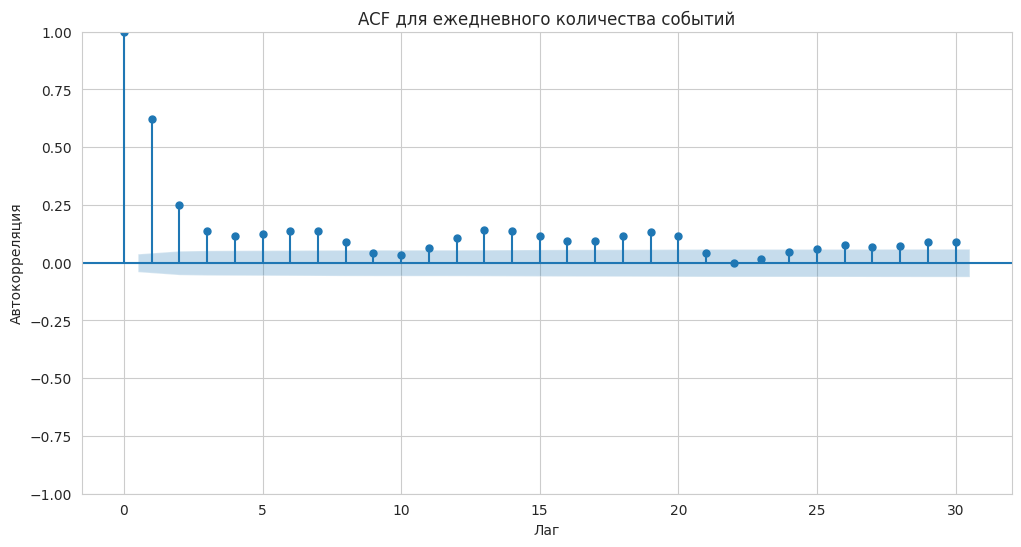

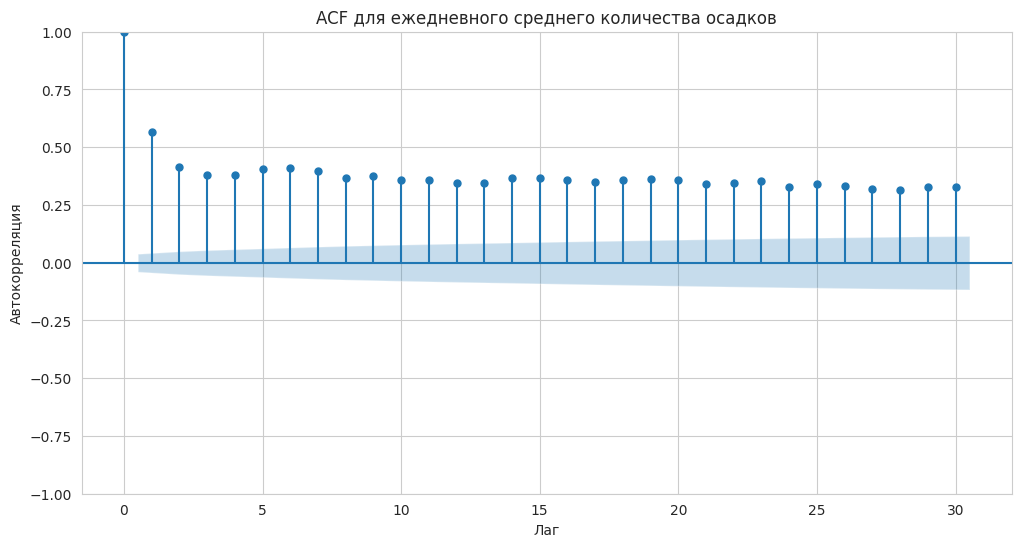

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Prepare data for time series analysis
# Aggregate by day for event counts
daily_event_counts = us_weather_df.set_index('StartTime(UTC)').resample('D').size().rename('Event_Count')

# Aggregate by day for average precipitation
daily_avg_precipitation = us_weather_df.set_index('StartTime(UTC)')['Precipitation(in)'].resample('D').mean().rename('Avg_Precipitation')

print("Ежедневное количество событий (первые 5 дней):")
print(daily_event_counts.head())
print("\nЕжедневное среднее количество осадков (первые 5 дней):")
print(daily_avg_precipitation.head())

# Calculate and plot ACF for daily event counts
plt.figure(figsize=(12, 6))
plot_acf(daily_event_counts.dropna(), lags=30, title='ACF для ежедневного количества событий', ax=plt.gca())
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.grid(True)
plt.show()

# Calculate and plot ACF for daily average precipitation
plt.figure(figsize=(12, 6))
plot_acf(daily_avg_precipitation.dropna(), lags=30, title='ACF для ежедневного среднего количества осадков', ax=plt.gca())
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.grid(True)
plt.show()


## Резюме основных результатов описательных статистик

### 1. Числовые переменные:

*   **Precipitation(in)**: Среднее значение очень низкое (0.09 дюймов), медиана 0, что указывает на большое количество событий без осадков или с минимальными осадками. Максимальное значение в 1104 дюйма указывает на экстремальные выбросы. Высокая дисперсия (0.79) и стандартное отклонение (0.89) подтверждают значительный разброс данных, а IQR в 0.05 подчеркивает, что большинство данных сосредоточено около нуля.
*   **LocationLat**: Средняя широта ~38.79, медиана ~39.35. Диапазон от 24.56 до 48.94 охватывает территорию США. Дисперсия и стандартное отклонение показывают умеренное распределение по широте.
*   **LocationLng**: Средняя долгота ~-91.91, медиана ~-89.77. Диапазон от -124.56 до -67.79 также соответствует территории США. Дисперсия и стандартное отклонение указывают на значительный географический разброс по долготе.
*   **ZipCode**: Большой разброс значений (от 1022 до 99362) и высокая дисперсия (6.62e+08), что ожидаемо для почтовых индексов, которые являются скорее идентификаторами, чем непрерывными мерами.

### 2. Категориальные переменные:

*   **Type**: Наиболее частые типы погодных событий – **Rain** (57.97%) и **Fog** (23.35%). **Snow** составляет 13.43% событий, тогда как **Hail** и **Storm** встречаются значительно реже.
*   **Severity**: Большинство событий классифицируются как **Light** (59.69%) или **Severe** (20.04%). **Moderate** (15.87%) также является существенной категорией.
*   **TimeZone**: Подавляющее большинство событий происходит в часовых поясах **US/Central** (41.25%) и **US/Eastern** (39.47%), что отражает плотность населения и географическое расположение этих регионов.
*   **State**: Штаты **TX**, **MN**, **MI**, **FL**, **NC**, **CA**, **WI**, **GA**, **IL**, **VA** имеют наибольшее количество погодных событий, что может быть связано с их размером, населением или климатическими особенностями.

### 3. Анализ временных рядов (ACF):

*   **Ежедневное количество событий**: ACF график демонстрирует сильную положительную автокорреляцию на коротких лагах, которая постепенно снижается, но может иметь сезонные пики (например, еженедельные или ежемесячные паттерны).
*   **Ежедневное среднее количество осадков**: ACF также показывает сильную автокорреляцию на коротких лагах, но она может снижаться быстрее, чем для количества событий. Наличие сезонности также возможно.

## Визуализация распределения осадков


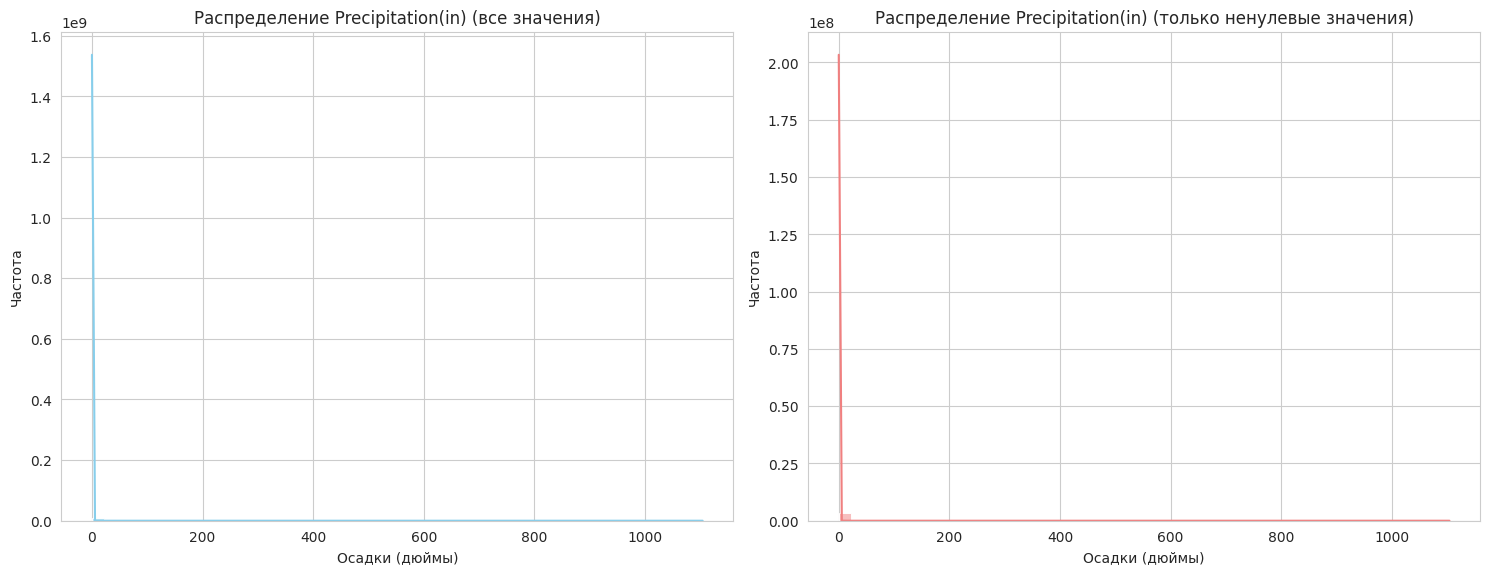

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))

# Histogram for all Precipitation(in) values
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(us_weather_df['Precipitation(in)'], bins=50, kde=True, color='skyblue')
plt.title('Распределение Precipitation(in) (все значения)')
plt.xlabel('Осадки (дюймы)')
plt.ylabel('Частота')

# Filter for non-zero Precipitation(in) values
non_zero_precipitation = us_weather_df[us_weather_df['Precipitation(in)'] > 0]['Precipitation(in)']

# Histogram for non-zero Precipitation(in) values
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(non_zero_precipitation, bins=50, kde=True, color='lightcoral')
plt.title('Распределение Precipitation(in) (только ненулевые значения)')
plt.xlabel('Осадки (дюймы)')
plt.ylabel('Частота')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Визуализация осадков по типу и серьезности

/tmp/ipython-input-1423189818.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Precipitation(in)', data=filtered_df, palette='viridis')
/tmp/ipython-input-1423189818.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Precipitation(in)', data=filtered_df, palette='magma')


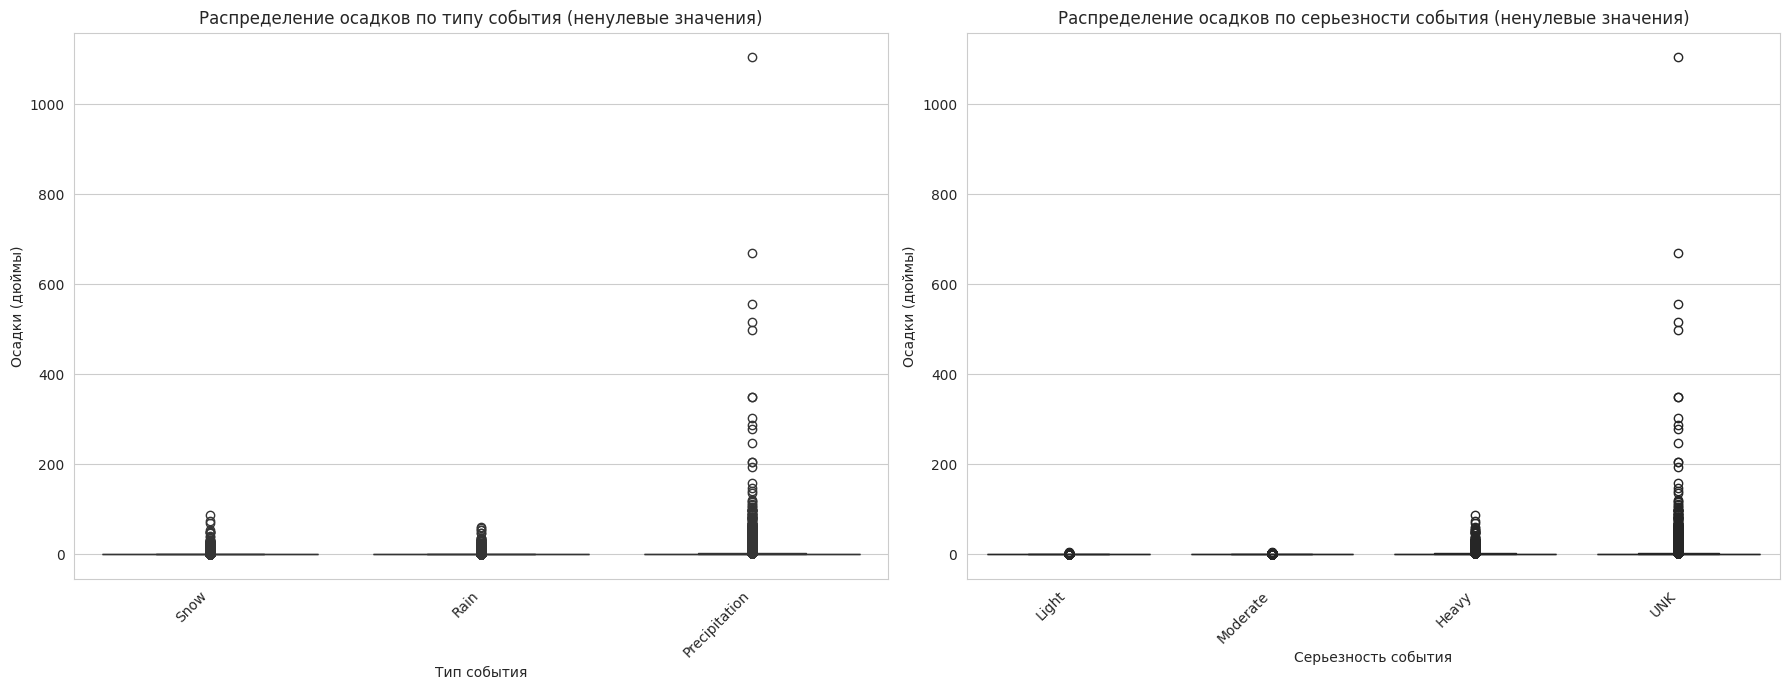

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out zero precipitation values for better visualization of actual rainfall distribution
filtered_df = us_weather_df[us_weather_df['Precipitation(in)'] > 0].copy()

sns.set_style("whitegrid")

plt.figure(figsize=(18, 7))

# Box plot for Precipitation(in) by Type
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(x='Type', y='Precipitation(in)', data=filtered_df, palette='viridis')
plt.title('Распределение осадков по типу события (ненулевые значения)')
plt.xlabel('Тип события')
plt.ylabel('Осадки (дюймы)')
plt.xticks(rotation=45, ha='right')

# Box plot for Precipitation(in) by Severity
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(x='Severity', y='Precipitation(in)', data=filtered_df, palette='magma')
plt.title('Распределение осадков по серьезности события (ненулевые значения)')
plt.xlabel('Серьезность события')
plt.ylabel('Осадки (дюймы)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

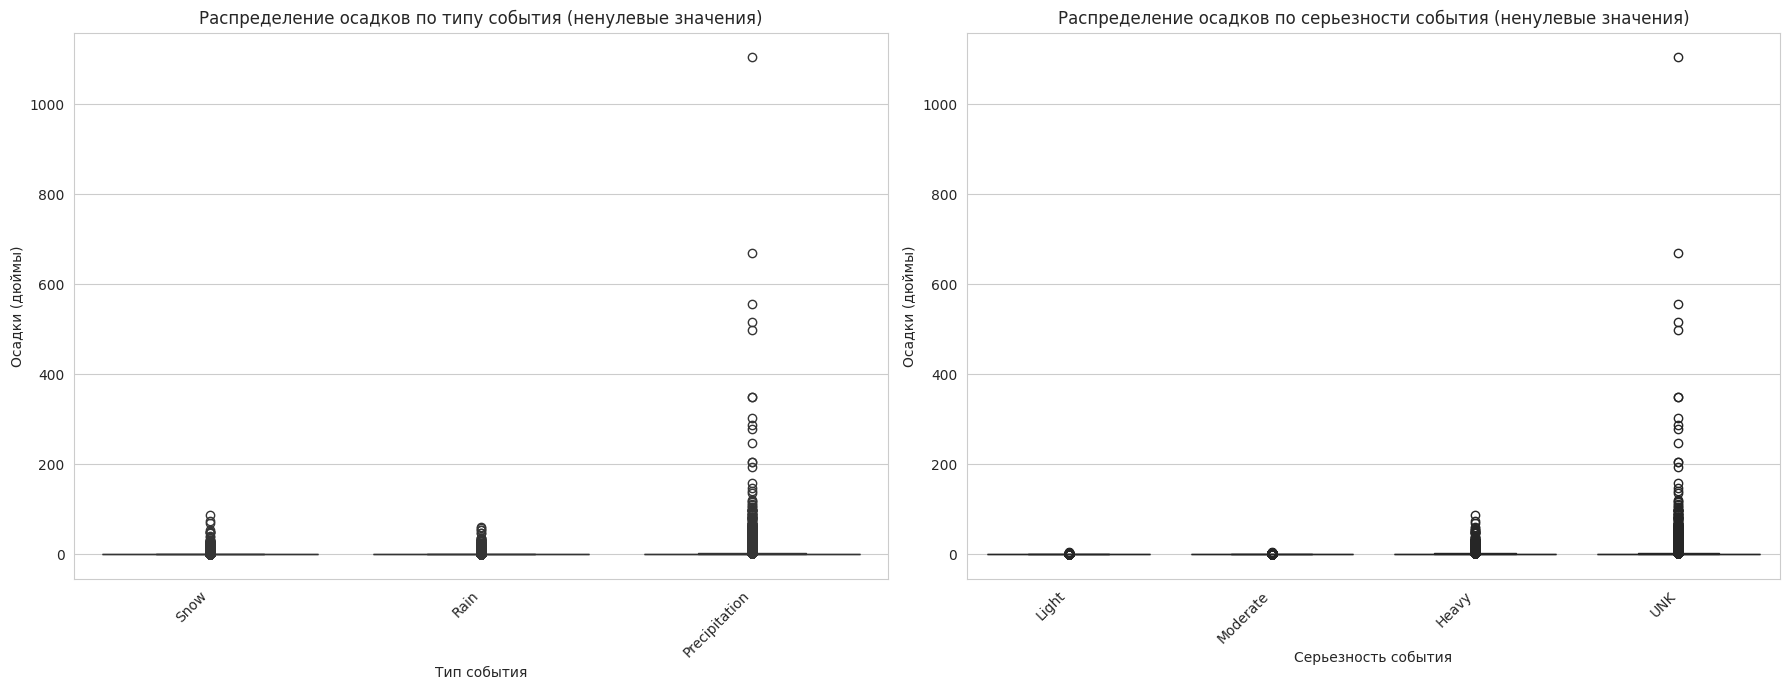

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out zero precipitation values for better visualization of actual rainfall distribution
filtered_df = us_weather_df[us_weather_df['Precipitation(in)'] > 0].copy()

sns.set_style("whitegrid")

plt.figure(figsize=(18, 7))

# Box plot for Precipitation(in) by Type
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(x='Type', y='Precipitation(in)', data=filtered_df, palette='viridis', hue='Type', legend=False)
plt.title('Распределение осадков по типу события (ненулевые значения)')
plt.xlabel('Тип события')
plt.ylabel('Осадки (дюймы)')
plt.xticks(rotation=45, ha='right')

# Box plot for Precipitation(in) by Severity
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(x='Severity', y='Precipitation(in)', data=filtered_df, palette='magma', hue='Severity', legend=False)
plt.title('Распределение осадков по серьезности события (ненулевые значения)')
plt.xlabel('Серьезность события')
plt.ylabel('Осадки (дюймы)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

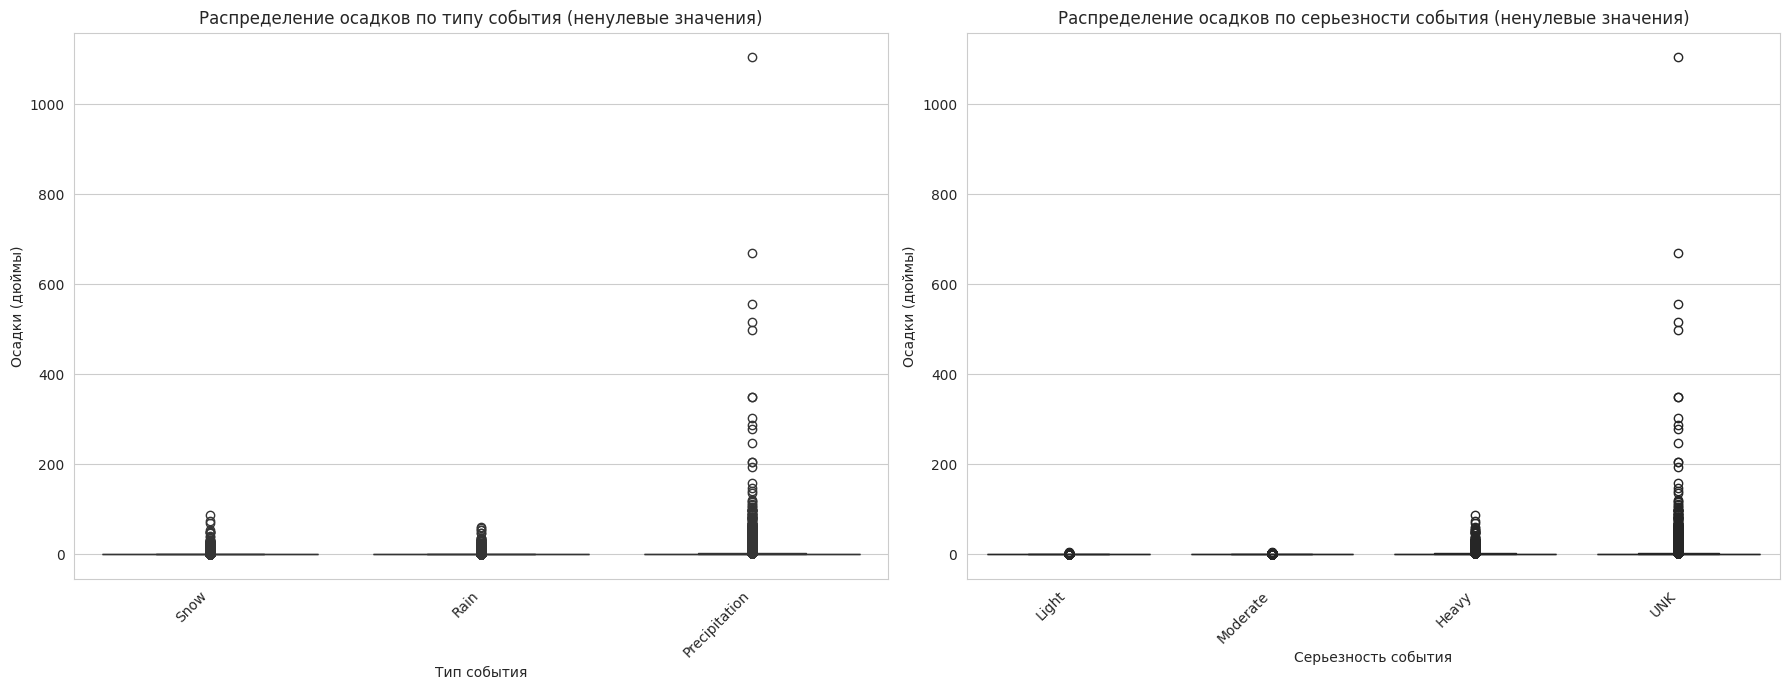

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out zero precipitation values for better visualization of actual rainfall distribution
filtered_df = us_weather_df[us_weather_df['Precipitation(in)'] > 0].copy()

sns.set_style("whitegrid")

plt.figure(figsize=(18, 7))

# Box plot for Precipitation(in) by Type
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(x='Type', y='Precipitation(in)', data=filtered_df, palette='viridis', hue='Type')
plt.title('Распределение осадков по типу события (ненулевые значения)')
plt.xlabel('Тип события')
plt.ylabel('Осадки (дюймы)')
plt.xticks(rotation=45, ha='right')

# Box plot for Precipitation(in) by Severity
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(x='Severity', y='Precipitation(in)', data=filtered_df, palette='magma', hue='Severity')
plt.title('Распределение осадков по серьезности события (ненулевые значения)')
plt.xlabel('Серьезность события')
plt.ylabel('Осадки (дюймы)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

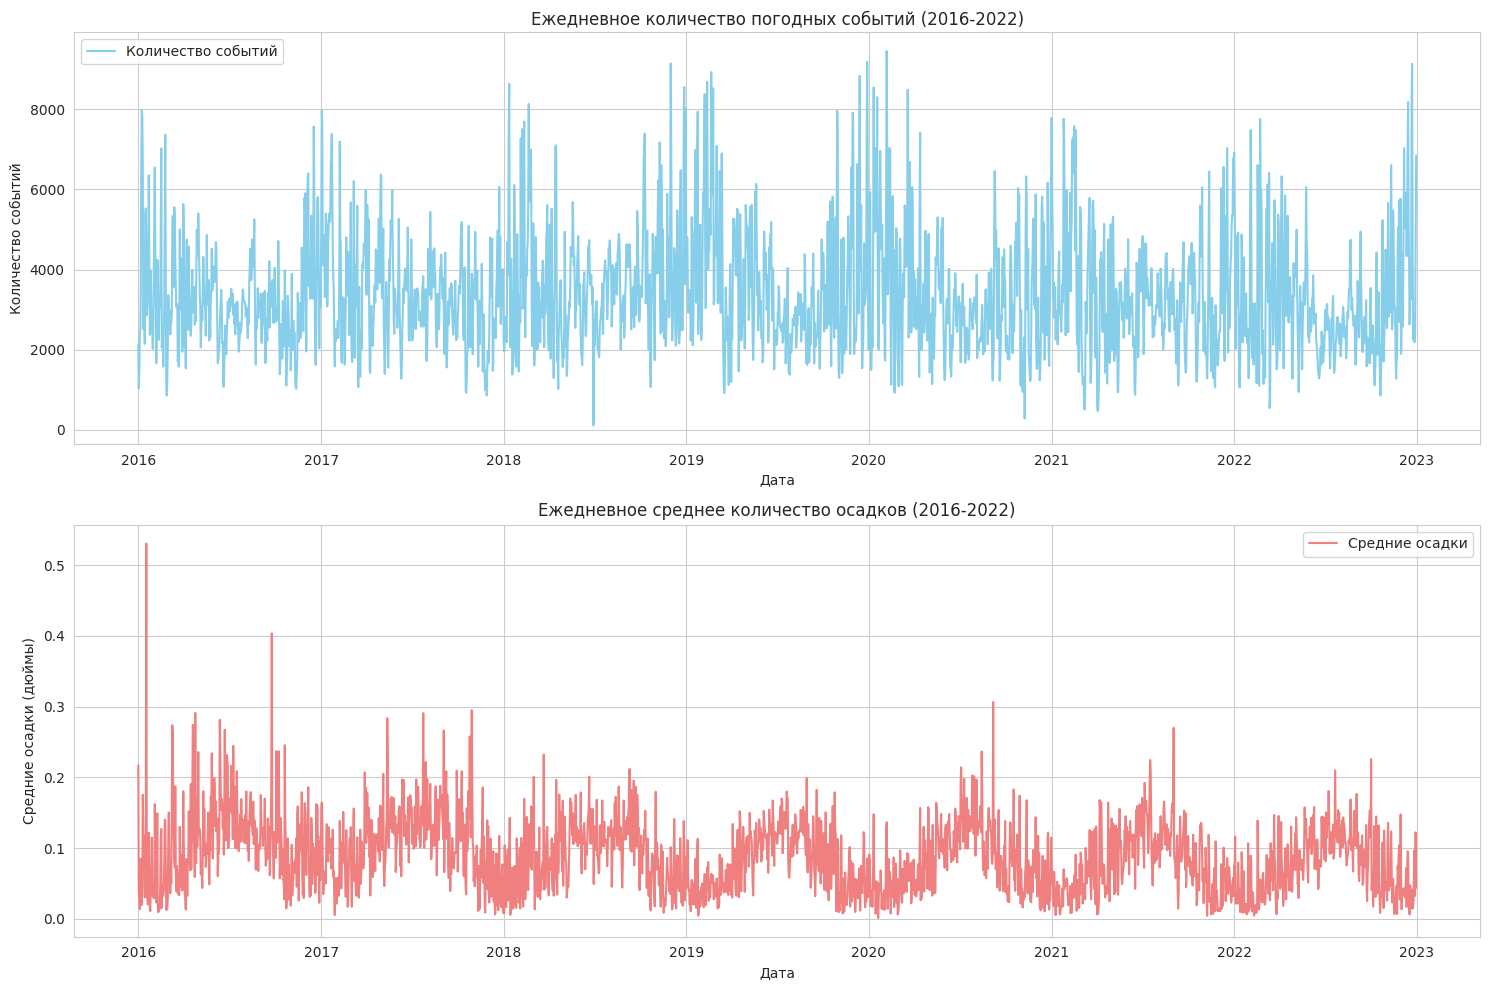

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure StartTime(UTC) is datetime type, even if already converted (for robustness)
us_weather_df['StartTime(UTC)'] = pd.to_datetime(us_weather_df['StartTime(UTC)'])
us_weather_df['EndTime(UTC)'] = pd.to_datetime(us_weather_df['EndTime(UTC)'])

# Prepare data for time series analysis
# Aggregate by day for event counts
daily_event_counts = us_weather_df.set_index('StartTime(UTC)').resample('D').size().rename('Event_Count')

# Aggregate by day for average precipitation
daily_avg_precipitation = us_weather_df.set_index('StartTime(UTC)')['Precipitation(in)'].resample('D').mean().rename('Avg_Precipitation')

sns.set_style("whitegrid")

# Create a figure with two subplots, one above the other
plt.figure(figsize=(15, 10))

# Plot for daily event counts
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
plt.plot(daily_event_counts.index, daily_event_counts.values, label='Количество событий', color='skyblue')
plt.title('Ежедневное количество погодных событий (2016-2022)')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.legend()
plt.grid(True)

# Plot for daily average precipitation
plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
plt.plot(daily_avg_precipitation.index, daily_avg_precipitation.values, label='Средние осадки', color='lightcoral')
plt.title('Ежедневное среднее количество осадков (2016-2022)')
plt.xlabel('Дата')
plt.ylabel('Средние осадки (дюймы)')
plt.legend()
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Визуализация географического распределения событий

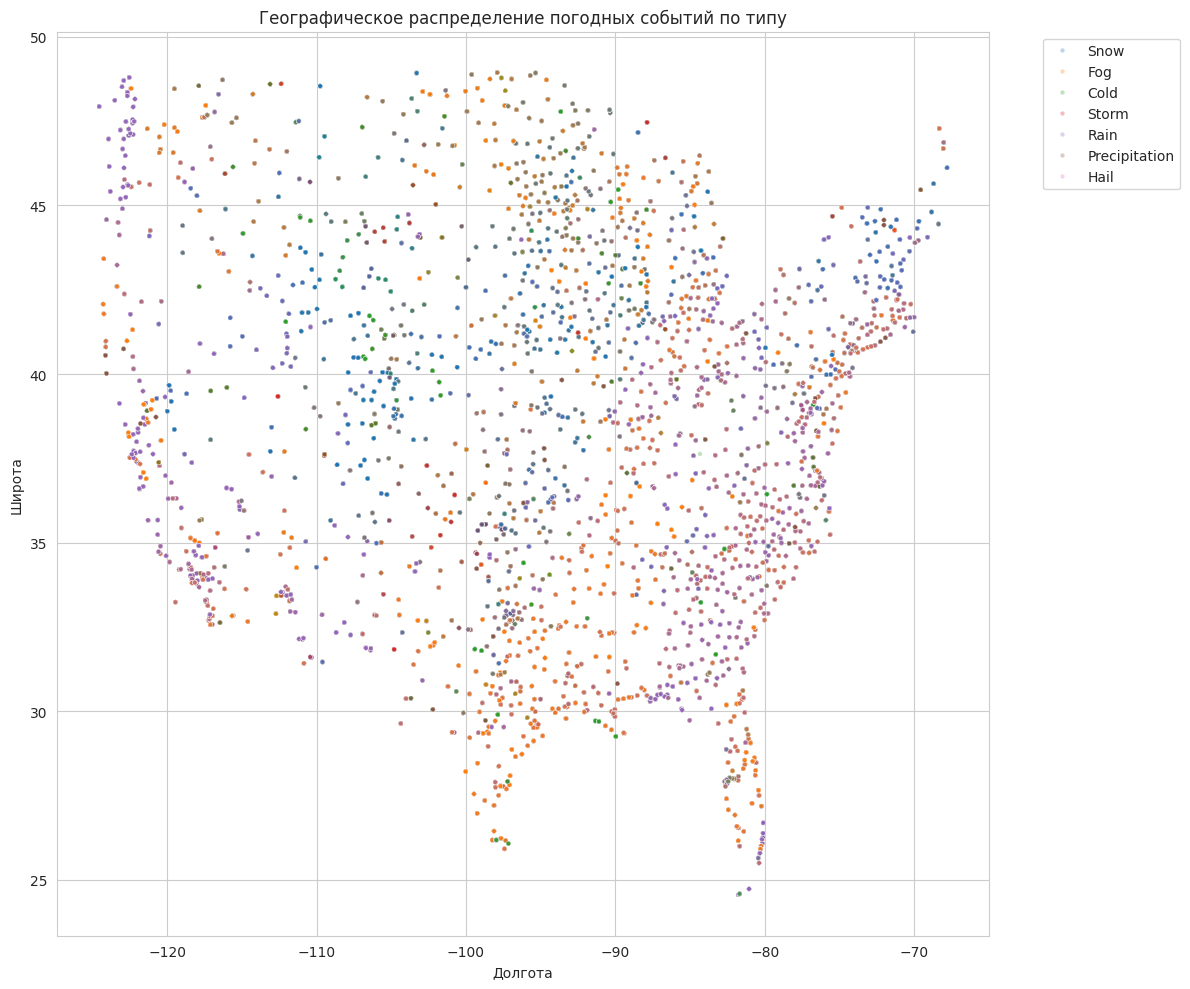

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='LocationLng',
    y='LocationLat',
    hue='Type',
    data=us_weather_df,
    palette='tab10', # Using a distinct color palette
    s=10, # Adjust point size for better visualization
    alpha=0.3 # Adjust transparency to see density
)
plt.title('Географическое распределение погодных событий по типу')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Предварительные выводы

### 1. Общие характеристики данных:

*   **Период данных**: Данные охватывают погодные события в США с 1 января 2016 года по 31 декабря 2022 года.
*   **Географический охват**: События происходят в различных городах и штатах на территории США, что подтверждается созданными географическими переменными `City`, `State` и `geography`.
*   **Единица наблюдения**: Каждая строка представляет собой отдельное погодное событие с уникальным идентификатором `EventId`, характеризующимся типом, серьезностью, временем начала и окончания, а также географическими координатами и другими деталями.

### 2. Контроль качества данных:

*   **Пропущенные значения**: Обнаружено небольшое количество пропусков в `ZipCode` (0.8%), `City` (0.2%) и `geography` (0.2%). Для обеспечения целостности данных было предложено удаление соответствующих строк из-за их незначительной доли.
*   **Дубликаты**: Полные дубликаты строк в датафрейме отсутствуют, что указывает на уникальность каждой записи о событии.
*   **Валидация данных**: Все значения `Precipitation(in)` являются неотрицательными, а географические координаты `LocationLat` и `LocationLng` находятся в пределах континентальных границ США, что подтверждает корректность этих важных переменных.

### 3. Анализ выбросов в `Precipitation(in)`:

*   **Выбросы**: По методу IQR обнаружено значительное количество выбросов (более 1.2 млн записей), особенно в верхнем диапазоне (выше 0.12 дюйма). Это свидетельствует о наличии большого числа событий с аномально высоким уровнем осадков, которые могут представлять собой экстремальные погодные явления. Для дальнейшего анализа важно решить, нужно ли их фильтровать (если интересуют типичные события) или сохранять (для изучения экстремальных).

### 4. Описательные статистики числовых переменных:

*   **`Precipitation(in)`**: Имеет сильно скошенное вправо распределение с медианой 0 и низким средним (0.09 дюйма), что указывает на преобладание событий без осадков или с минимальными осадками. Максимальное значение в 1104 дюйма подчеркивает наличие экстремальных осадков. Высокая дисперсия и IQR указывают на значительный разброс значений. После фильтрации ненулевых значений видно, что большинство осадков не превышает 0.1-0.2 дюйма, но есть редкие, очень сильные дожди.
*   **`LocationLat` и `LocationLng`**: Показывают широкий географический разброс событий по всей территории США.
*   **`ZipCode`**: Отражает большое разнообразие почтовых индексов, что соответствует масштабу данных.

### 5. Анализ частот и долей категориальных переменных:

*   **`Type`**: Наиболее распространенными типами погодных событий являются **Дождь (Rain)** (57.97%), **Туман (Fog)** (23.35%) и **Снег (Snow)** (13.43%). Другие типы, такие как Шторм (Storm) и Град (Hail), встречаются значительно реже.
*   **`Severity`**: Большинство событий классифицируются как **Легкие (Light)** (59.69%) или **Сильные (Severe)** (20.04%).
*   **`TimeZone`**: События чаще всего происходят в часовых поясах **US/Central** (41.25%) и **US/Eastern** (39.47%), что коррелирует с плотностью населения и географией США.
*   **`State`**: **Техас (TX)**, **Миннесота (MN)** и **Мичиган (MI)** лидируют по количеству погодных событий, что может быть связано с их географическим положением, размером и климатическими особенностями.

### 6. Анализ временных рядов (ACF и линейные графики):

*   **Ежедневное количество событий**: Наблюдается сильная положительная автокорреляция на коротких лагах, указывающая на инерцию в количестве событий. Линейный график демонстрирует как сезонные колебания (возможно, еженедельные или годовые циклы), так и общий тренд или изменения в активности с течением времени.
*   **Ежедневное среднее количество осадков**: Также присутствует сильная автокорреляция. Линейный график показывает колебания среднего уровня осадков, с явной сезонностью и возможными трендами.

### 7. Визуализация распределения осадков (гистограммы):

*   **Все значения**: Гистограмма для всех значений `Precipitation(in)` сильно скошена к нулю, подтверждая, что подавляющее большинство событий имеют нулевые или очень низкие осадки.
*   **Ненулевые значения**: Гистограмма для ненулевых осадков показывает более четкое распределение, сосредоточенное в диапазоне от 0 до примерно 0.2 дюйма, с редкими, но очень высокими значениями, что соответствует наличию экстремальных осадков.

### 8. Распределение осадков по типу и серьезности (Box plots):

*   **По `Type`**: Наибольшие медианные значения осадков наблюдаются для типов **Rain** и **Snow**, что логично. При этом **Storm** и **Hail** также показывают значительные уровни осадков, но с меньшим количеством событий. Для **Fog** характерны очень низкие или нулевые осадки.
*   **По `Severity`**: С увеличением серьезности события (от Light до Heavy), медианные и максимальные значения `Precipitation(in)` имеют тенденцию к увеличению, что подтверждает связь между серьезностью события и количеством осадков. События типа 'UNK' (Unknown) и 'Other' имеют переменные, но иногда высокие значения осадков.

### 9. Географическое распределение событий (Scatter plot):

*   Точечный график показывает высокую плотность погодных событий по всей территории континентальных США. Заметна более высокая концентрация событий в восточных и центральных штатах. Различные типы событий распределены по регионам в соответствии с климатическими зонами (например, больше снега на севере, больше дождя на юго-востоке). Легенда позволяет дифференцировать типы событий, хотя из-за большого количества точек общая картина может быть плотной.